 # Titanic Decision Tree

Create a decision tree that can predict the survival of passengers on the Titanic. Make sure not to impose any restrictions on the depth of the tree.


● Use the decision_tree_titanic.ipynb file provided, which has the titanic.csv dataset loaded (sourced here) to complete the task.


● Select relevant variables from the data and split the data into a training, development, and test set.


● Train a decision tree and make a plot of it.


● Compute your model’s accuracy on the development set.


● Try building your model with different values of max_depth (2–10). At each step, create a plot of your tree and store the accuracies on both the training and development data.


● Plot a line of your training accuracies and another of your development accuracies in the same graph. Write down what shape the lines have and what this shape means.


● Report the accuracy of your final model on the test data.



In [1]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.tree import plot_tree

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

# Load the data

In [2]:
# Load the dataset
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Drop columns that won't be used
titanic_df.drop(["Cabin", "Name", "Ticket", "PassengerId"], axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [5]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [6]:
# Handle missing values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.head()

C:\Users\gagva\AppData\Local\Temp\ipykernel_39620\608534215.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
C:\Users\gagva\AppData\Local\Temp\ipykernel_39620\608534215.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
# Encoding categorical variables
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [8]:
# Encoding categorical variables
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


Select relevant variables from the data and split the data into a training, development, and test set.

 # Select relevant variables from the data and split the data into a training, development, and test set.

# Data Spliting

In [9]:
# Define the features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [20]:
# Split the data into training, development, and test sets
r=42
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=r)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=r)

# Display the shapes of the splits
(X_train.shape, X_dev.shape, X_test.shape)

((534, 10), (178, 10), (179, 10))

# Train a decision tree and make a plot of it.

In [21]:
# Train a decision tree model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)

# Print the performance witoud prunning
print("Performance without pruning:", unpruned.score(X_dev, y_dev))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning: 0.6910112359550562
At depth: 17


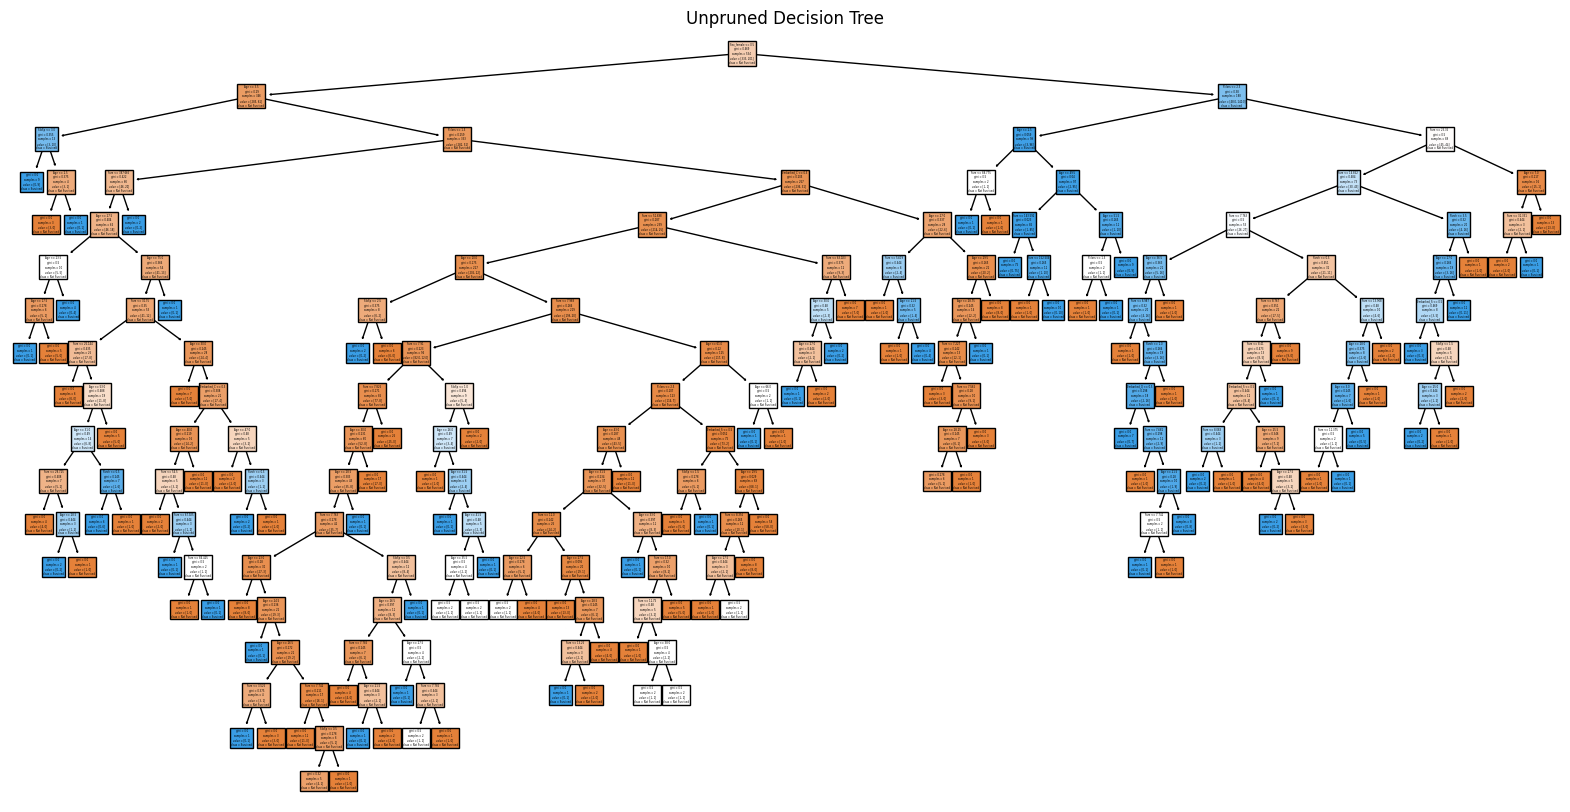

In [41]:
# Plot the unpruned tree
plt.figure(figsize=(20,10))
plot_tree(unpruned, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title('Unpruned Decision Tree')
plt.show()

# Analyze the effect of pruning

In [42]:
# Check the performance for trees with different max_depth values
pruned_depths = range(1, unpruned.tree_.max_depth + 1)

In [43]:
pruned_scores_train = []
pruned_scores_dev = []

for d in pruned_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=r)
    clf.fit(X_train, y_train)
    pruned_scores_train.append(clf.score(X_train, y_train))
    pruned_scores_dev.append(clf.score(X_dev, y_dev))

# Compute your model’s accuracy on the development set.

# Plotting the training and development accuracies for different depths

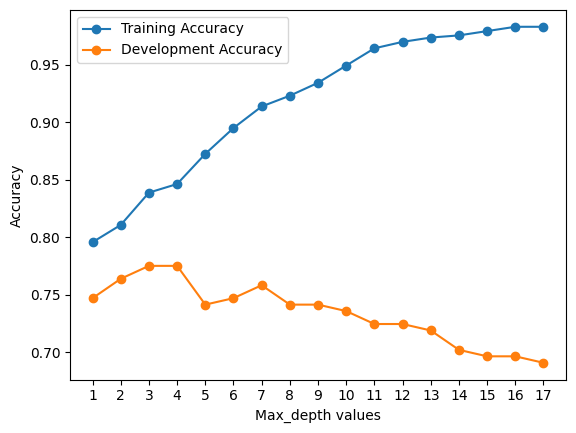

In [39]:
# Plotting the training and development accuracies
fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores_train, marker='o', label='Training Accuracy')
ax.plot(pruned_depths, pruned_scores_dev, marker='o', label='Development Accuracy')

plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")

ax.xaxis.set_ticks(pruned_depths)
plt.legend()
plt.show()

# Fitting the chosen tree with the best max_depth

In [44]:
# Fitting the chosen tree
best_depth = pruned_depths[np.argmax(pruned_scores_dev)]
print('Best performance reached at depth of:', best_depth)

Best performance reached at depth of: 3


In [45]:
pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

DecisionTreeClassifier(max_depth=3)

# Visualization of the tree

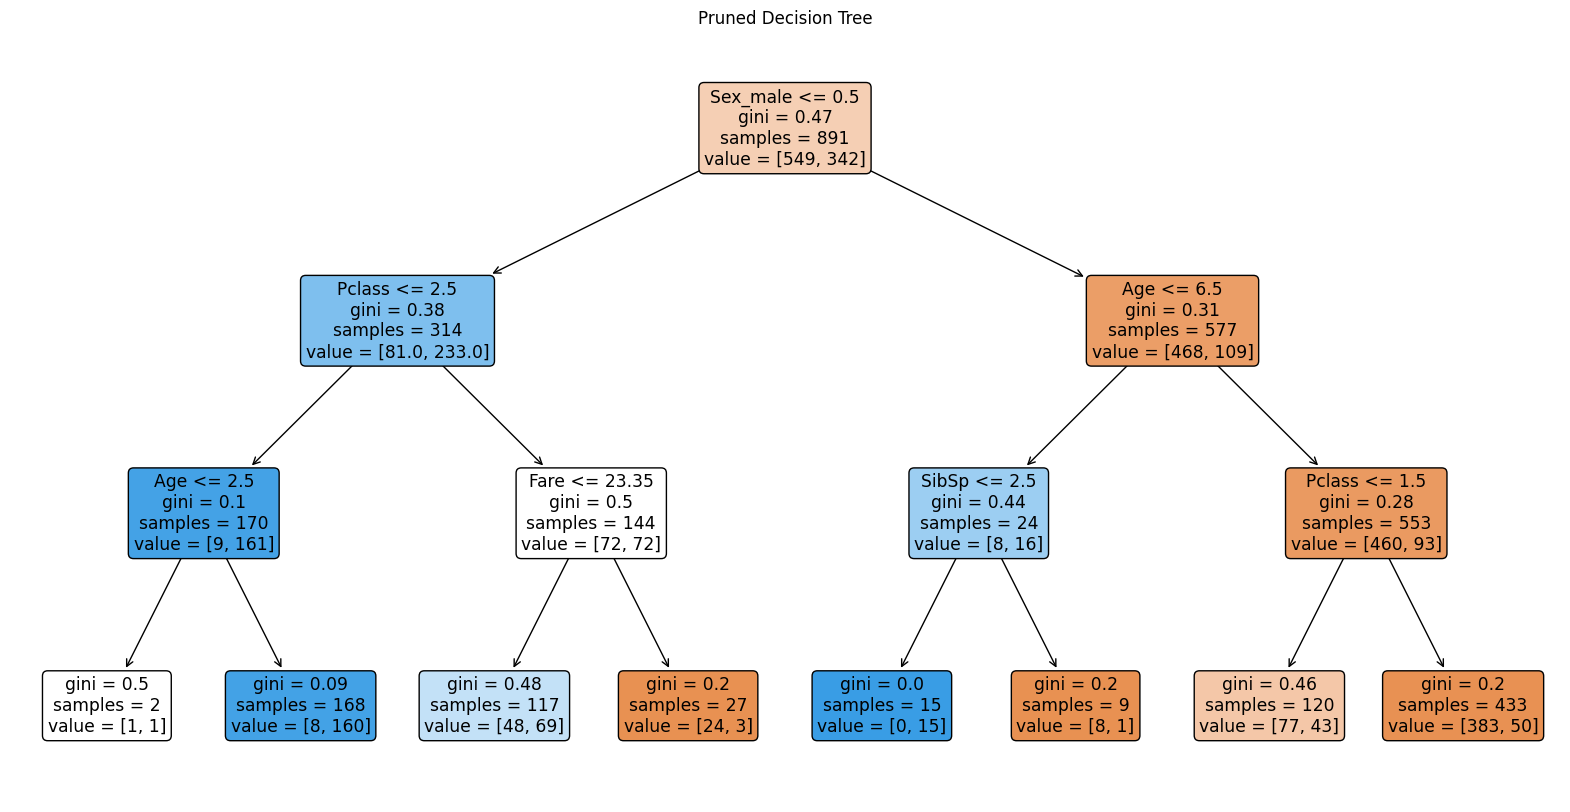

In [46]:
# Visualizing the pruned tree
graphviz_installed = False

if graphviz_installed:
    export_graphviz(pruned, out_file='pruned_tree.dot', feature_names=X.columns,
                    rounded=True, proportion=False, precision=2, filled=True)
    
    # Convert to png using system command
    call(['dot', '-Tpng', 'pruned_tree.dot', '-o', 'pruned_tree.png', '-Gdpi=600'])
    
    Image(filename = 'pruned_tree.png')
else: 
    fig = plt.figure(figsize=(20, 10))
    tree.plot_tree(pruned, feature_names=X.columns, rounded=True, proportion=False, precision=2, filled=True)
    plt.title('Pruned Decision Tree')
    fig.savefig('pruned_tree.png')
    plt.show()

# Evaluate the model on the development set.

In [47]:
# Evaluate on the test set with the best max_depth
final_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=r)
final_clf.fit(X_train, y_train)

y_test_pred = final_clf.predict(X_test)
test_accuracy = final_clf.score(X_test, y_test)
print(f'Test Set Accuracy with max_depth={best_depth}: {test_accuracy:.4f}')

Test Set Accuracy with max_depth=3: 0.8212


# Try building your model with different values of max_depth (2–10). At each step, create a plot of your tree and store the accuracies on both the training and development data.

# Hyperparameter Tuning: Train models with different max_depth values and store the accuracies.

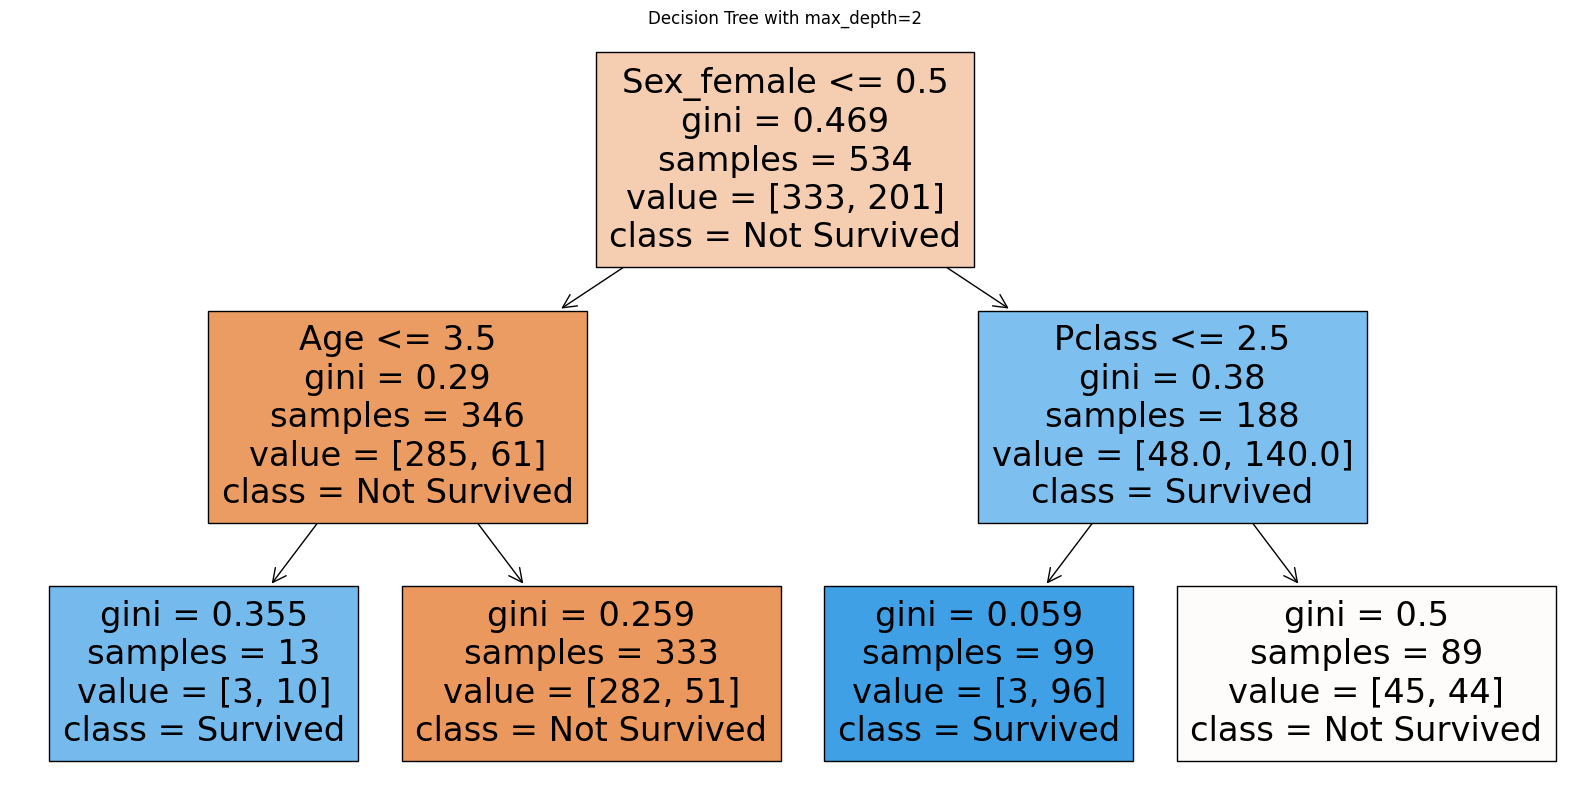

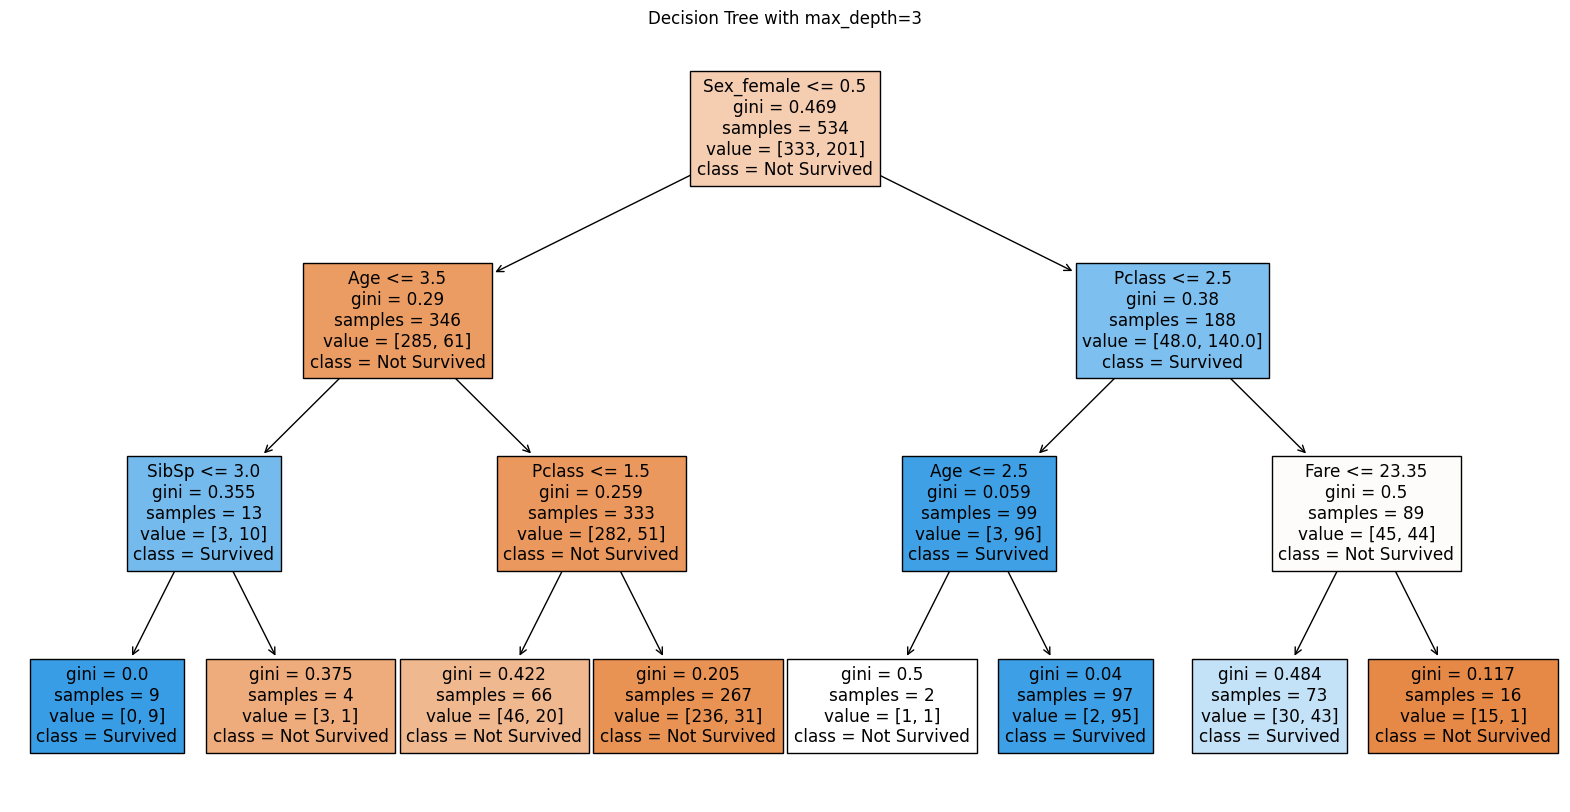

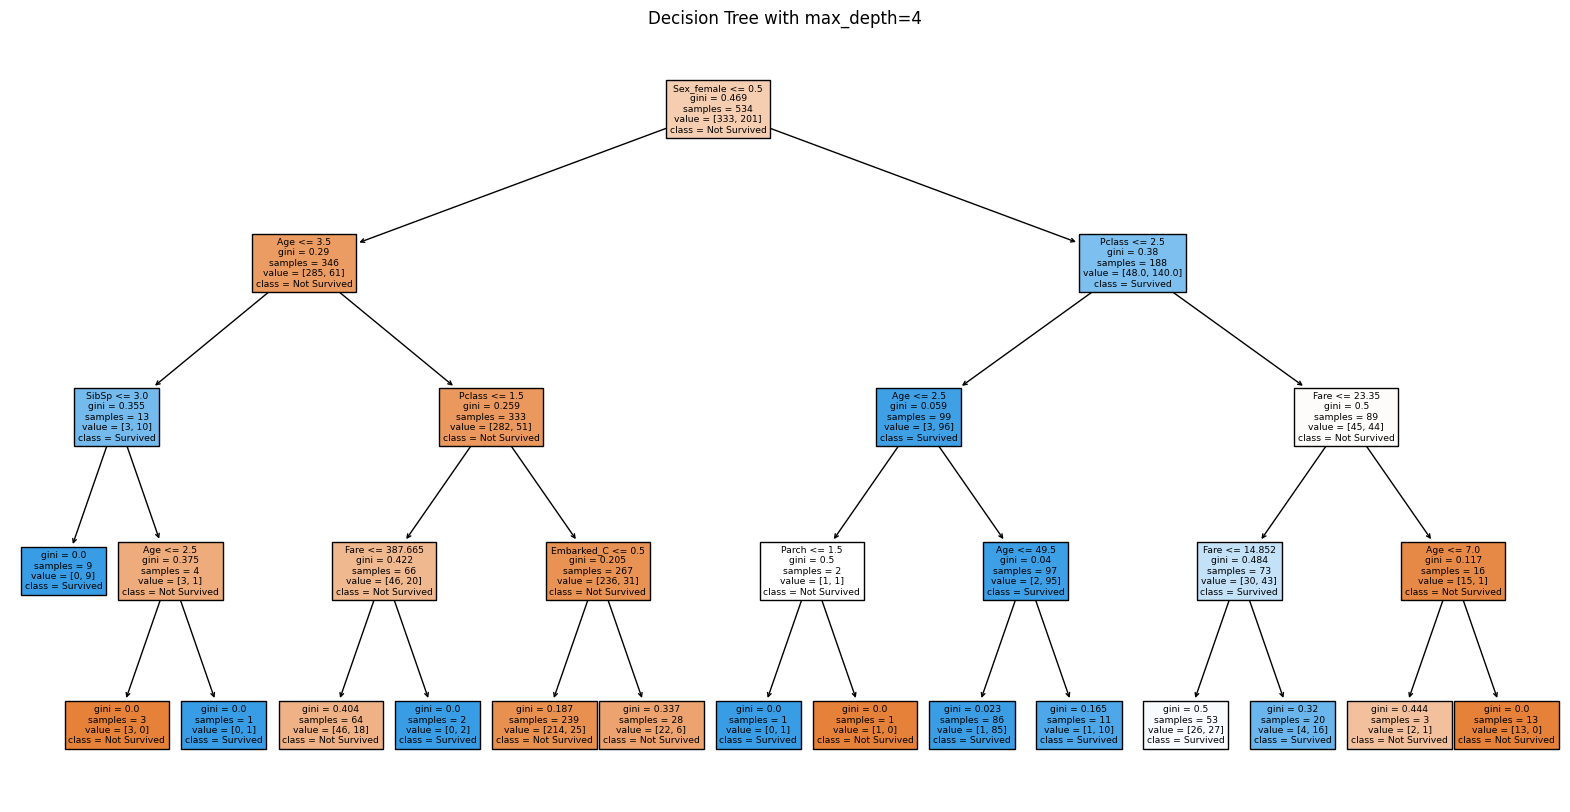

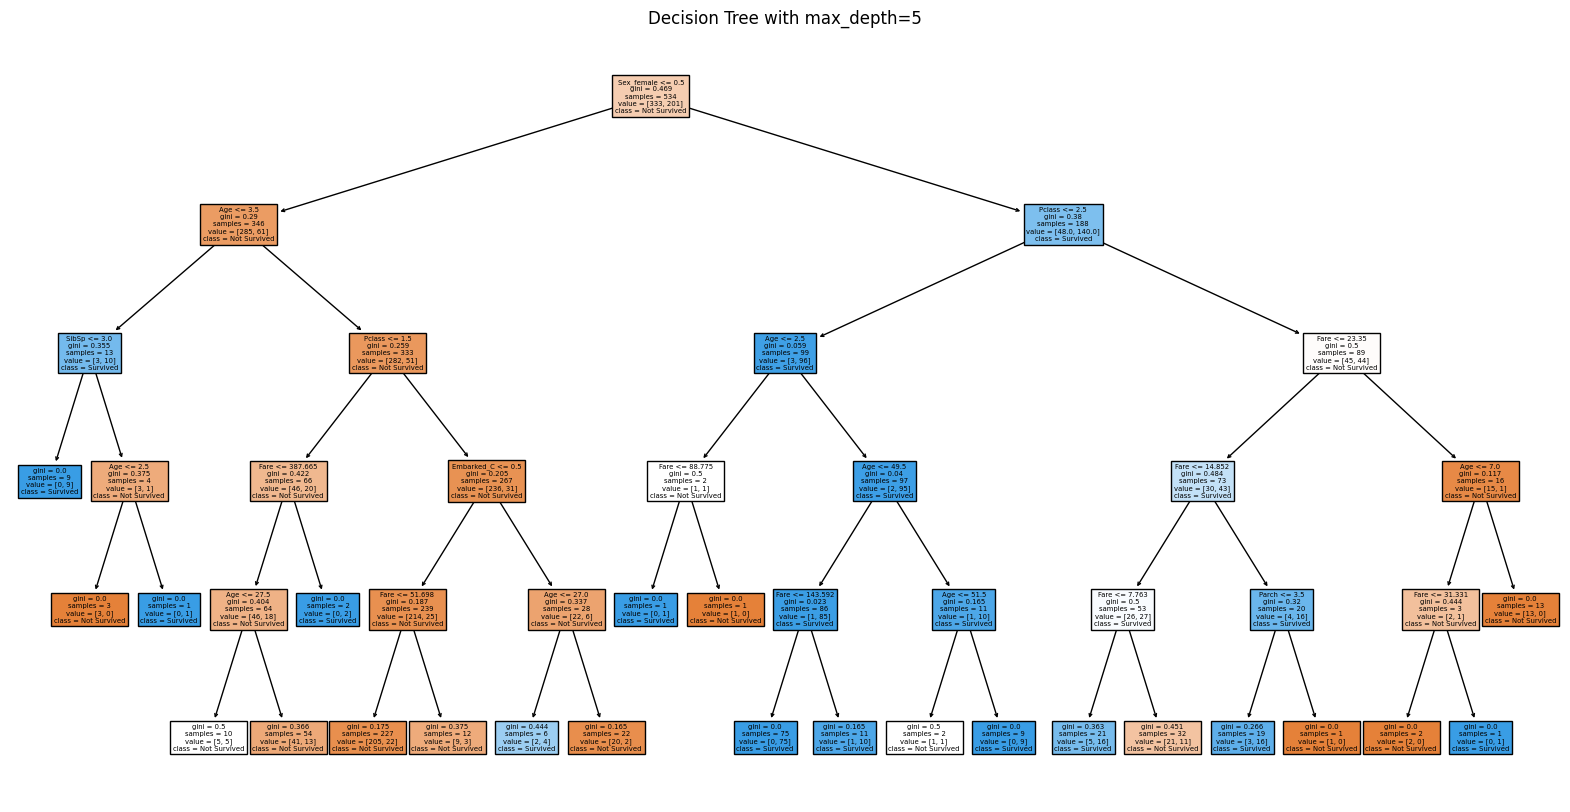

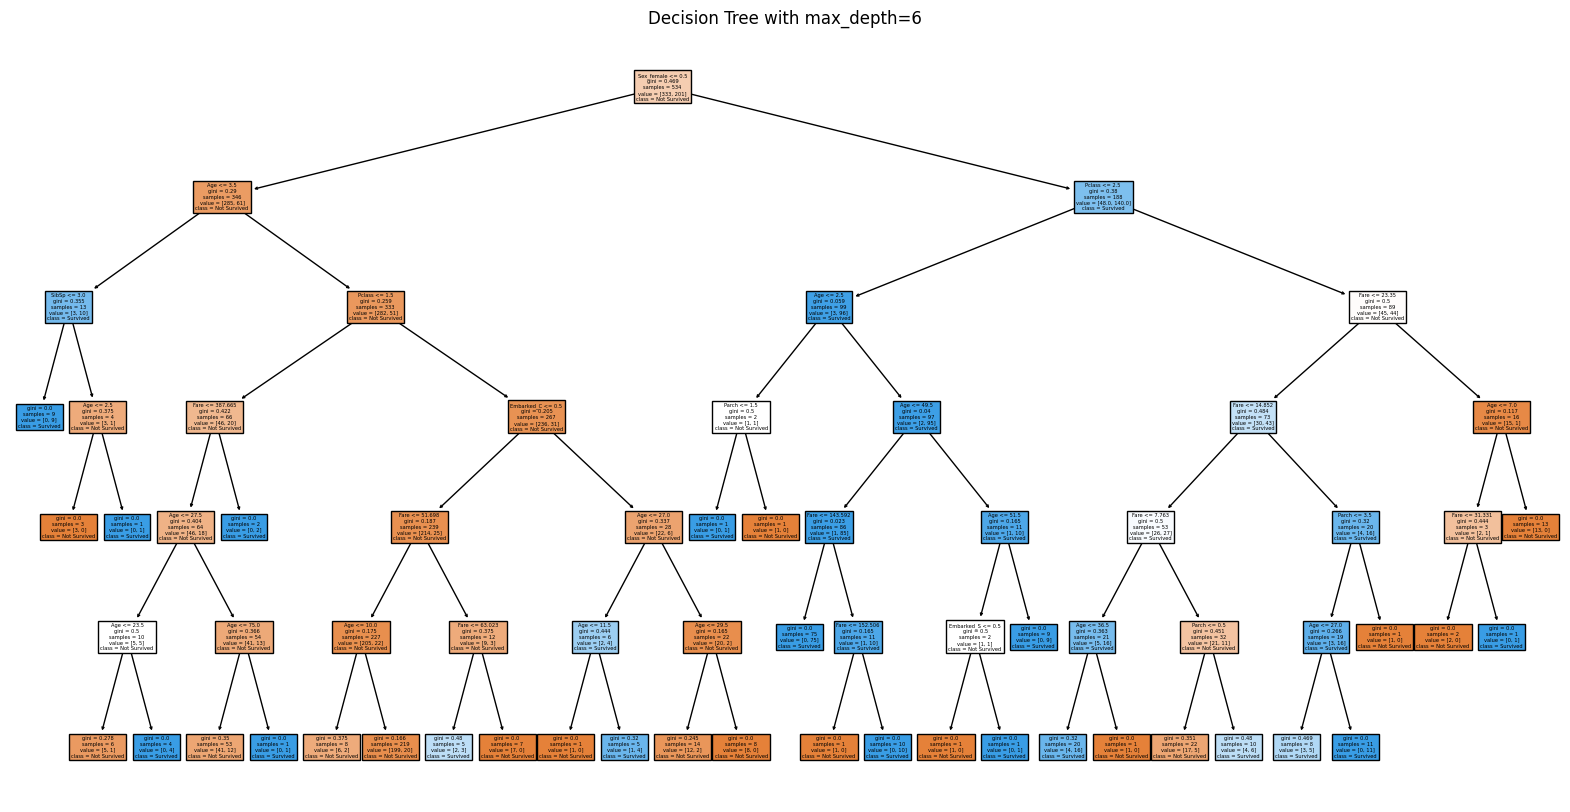

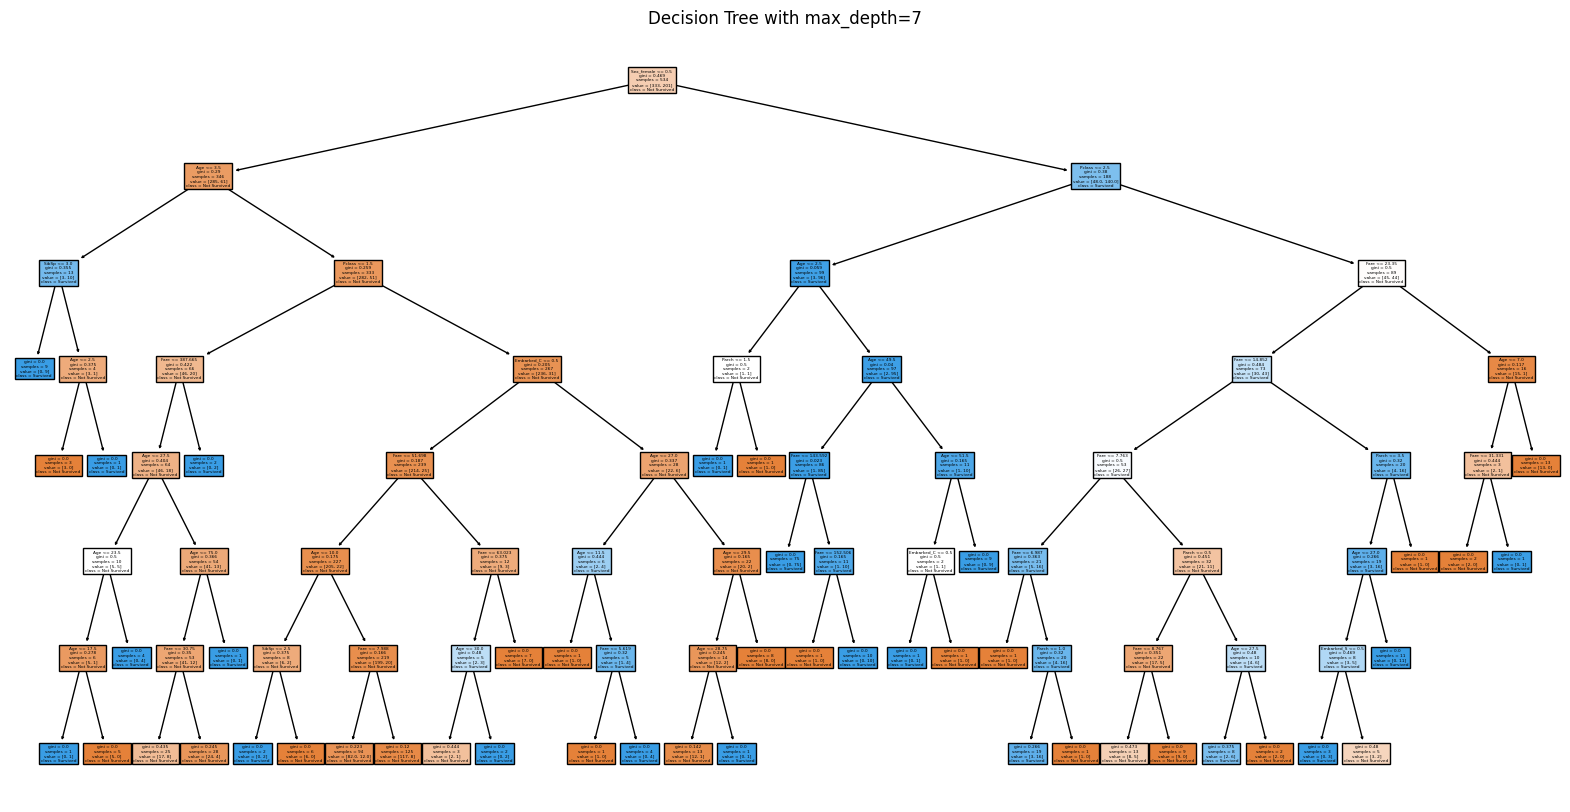

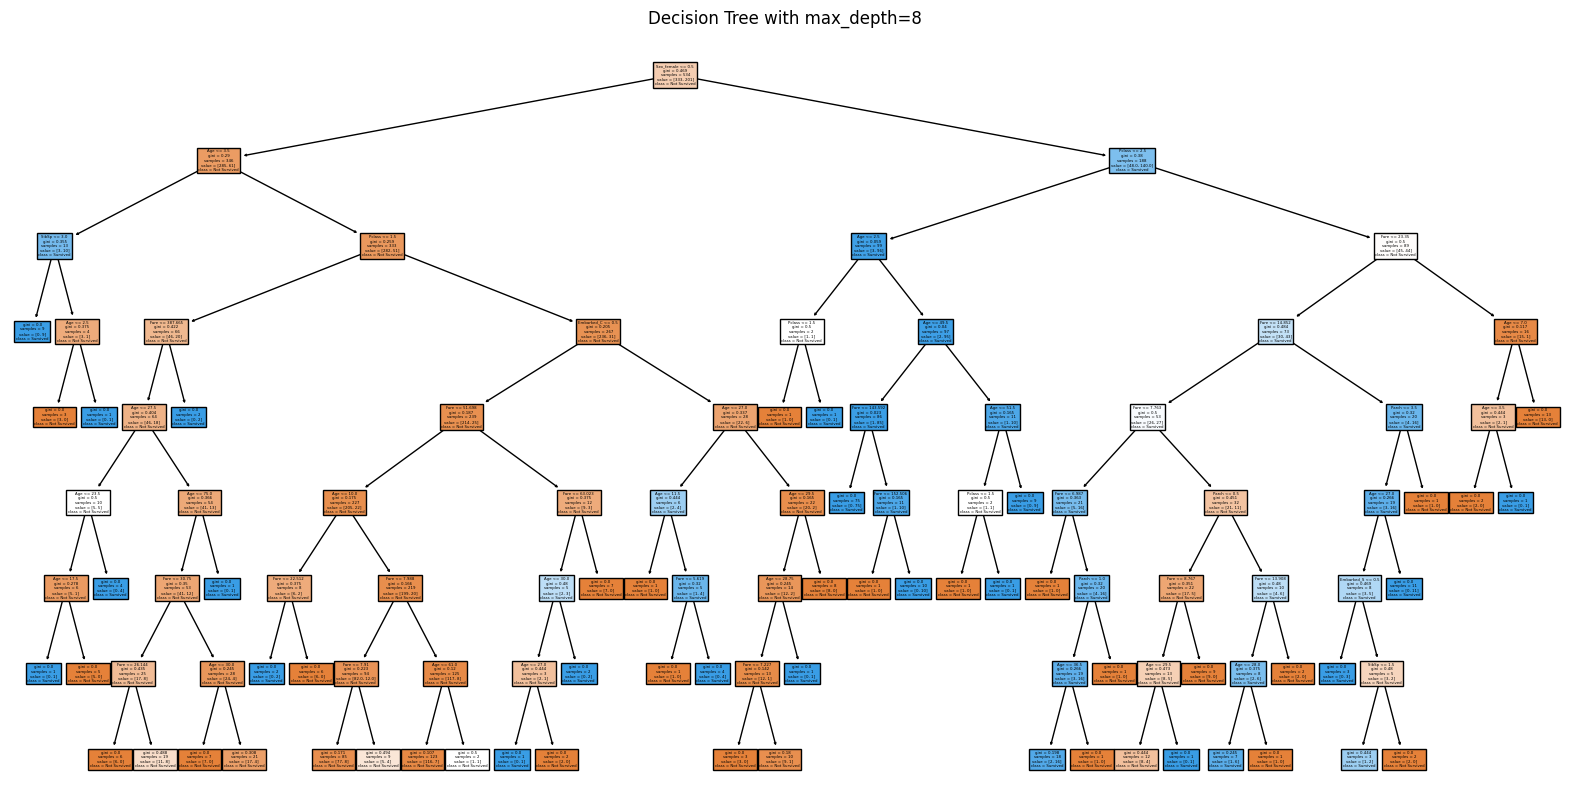

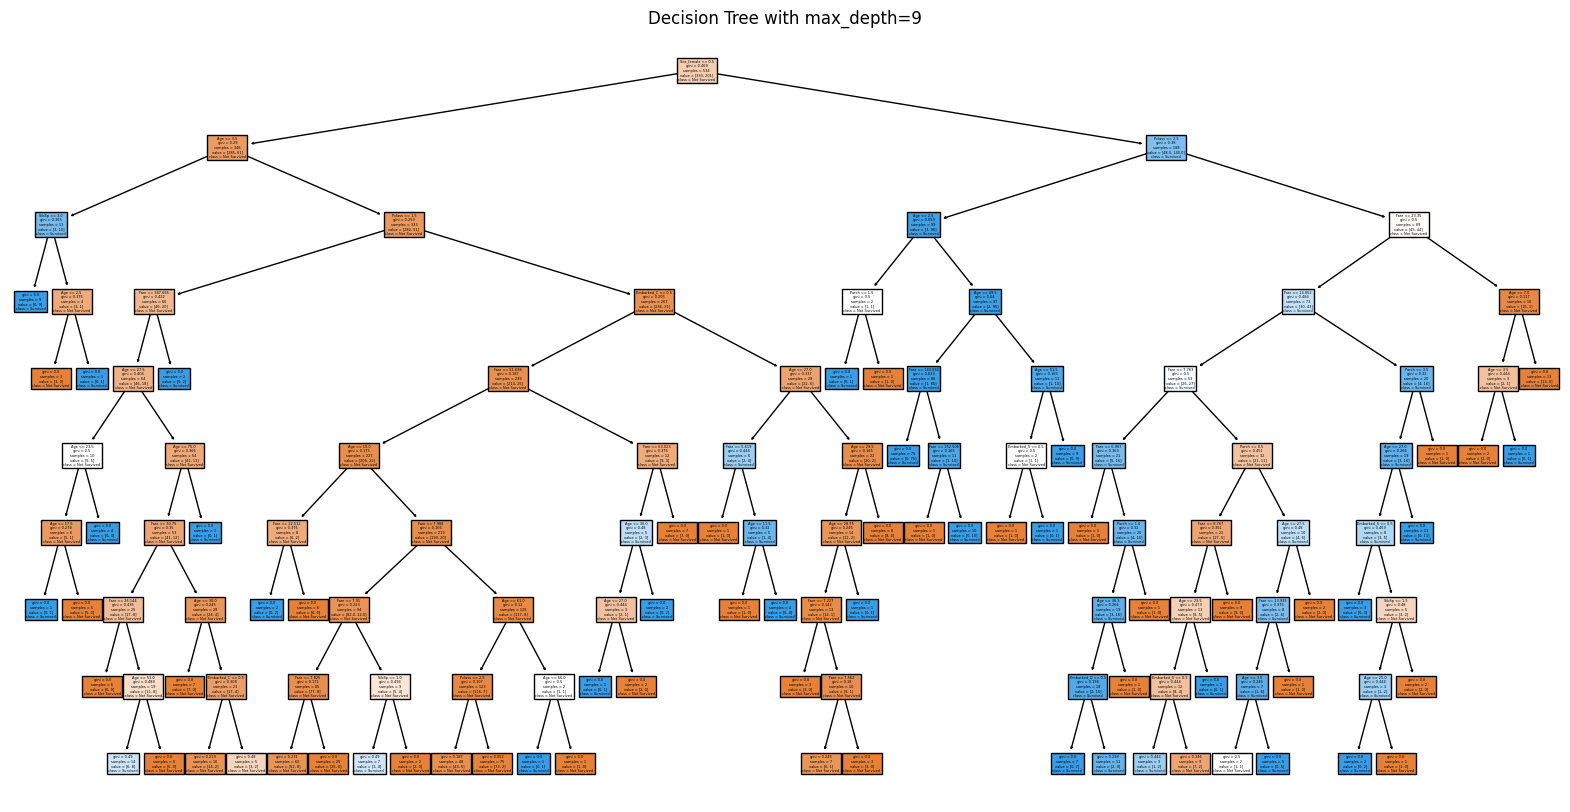

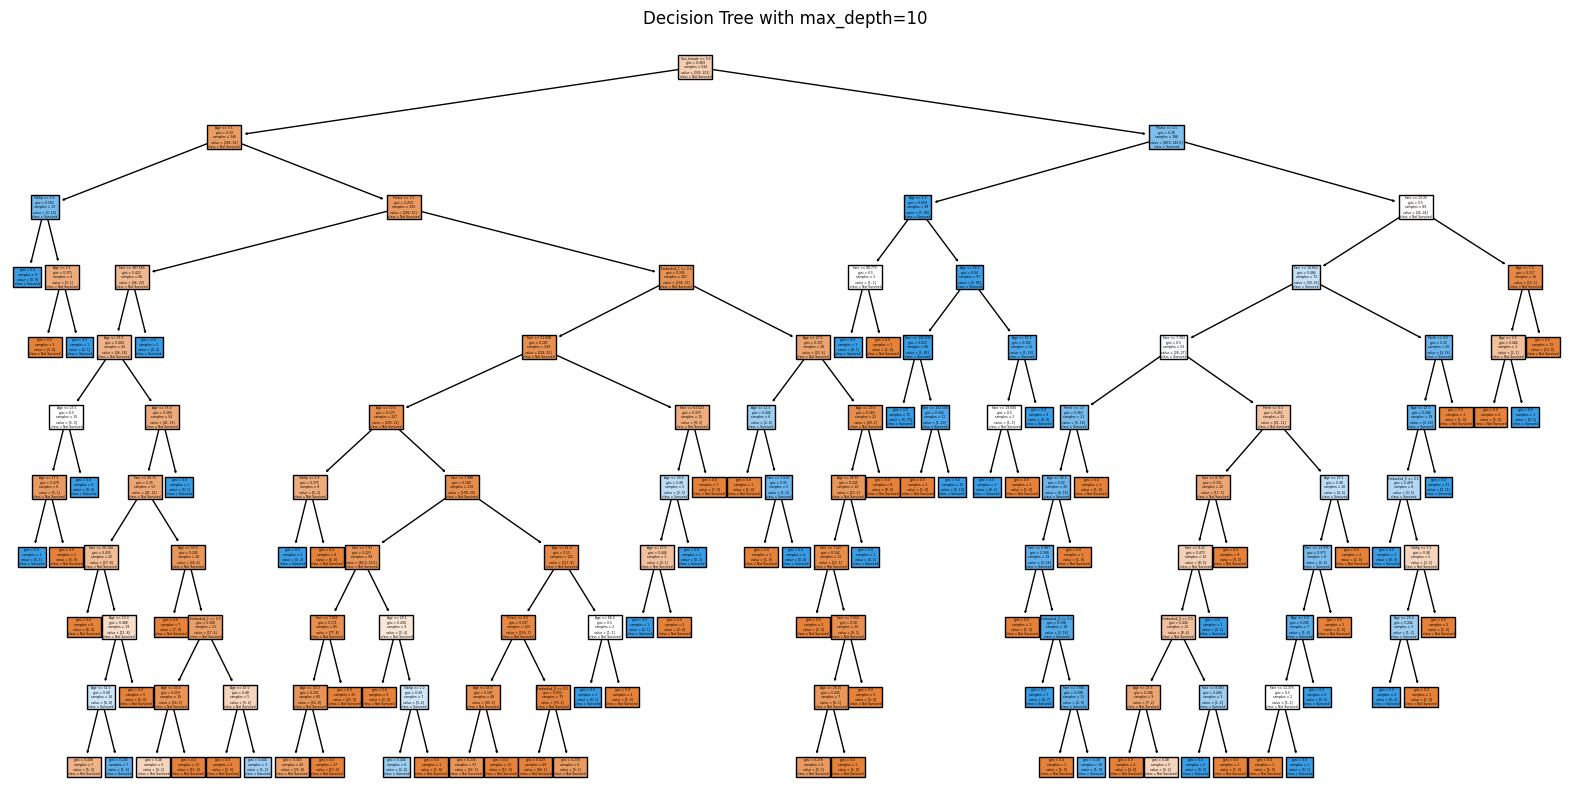

In [48]:
# Trying different values of max_depth (2–10) to find the best one
train_accuracies = []
dev_accuracies = []

for depth in range(2, 11):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Training accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Development accuracy
    y_dev_pred = clf.predict(X_dev)
    dev_accuracy = metrics.accuracy_score(y_dev, y_dev_pred)
    dev_accuracies.append(dev_accuracy)

    # Plot the decision tree for the current depth
    plt.figure(figsize=(20,10))
    plot_tree(clf, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
    plt.title(f'Decision Tree with max_depth={depth}')
    plt.show()

# Plot a line of your training accuracies and another of your development accuracies in the same graph.

Plot the training and development accuracies.

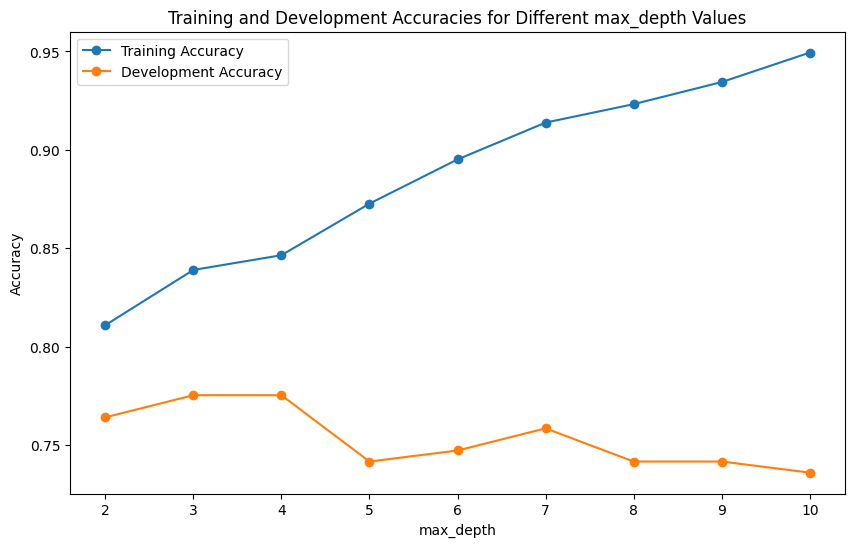

In [35]:
# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), train_accuracies, marker='o', label='Training Accuracy')
plt.plot(range(2, 11), dev_accuracies, marker='o', label='Development Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracies for Different max_depth Values')
plt.legend()
plt.show()

# Write down what shape the lines have and what this shape means.

Development Accuracy: initially increases slightly, reaching a peak around max_depth of 3 (At lower depths (2 to 3), both training and development accuracies are relatively close). This suggests a good balance between bias and variance. After reaching the peak, the development accuracy starts to decrease, with some fluctuations as the depth increases further.

Based on the plot and accuracies, it is clear that the model with max_depth of 3 is optimal for this task. 

The training accuracy continuously improves with increasing depth, indicating that the model is fitting the training data very well. This also means that the model is starting to overfit the training data.

Overfitting occurs when the model captures noise and specific patterns that do not generalize well to unseen data, which is reflected in the decreasing development accuracy beyond a certain depth.


# Evaluate the final model on the test data.

In [49]:
# Choose the best max_depth based on the development set accuracy
best_depth = range(2, 11)[dev_accuracies.index(max(dev_accuracies))]

In [50]:
# Train the final model with the best max_depth
final_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
final_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# Report the accuracy of your final model on the test data

In [51]:
# Evaluate on the test set
y_test_pred = final_clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
print(f'Test Set Accuracy with max_depth={best_depth}: {test_accuracy:.4f}')

Test Set Accuracy with max_depth=3: 0.8212


# Conclusions

The data was split into training, development, and test sets with the following shapes:

Training set (X_train): 534 samples
Development set (X_dev): 178 samples
Test set (X_test): 179 samples

Initial Model without Pruning:
The performance on the development set was 69.1%.
This model likely overfits the training data due to its high depth (maximun depth 17), capturing noise and potentially irrelevant patterns.

Effect of Pruning:
To prevent overfitting, the model was trained with different values of max_depth ranging from 2 to 10.
The best performance on the development set was achieved with a max_depth of 3.
The final pruned model with max_depth=3 achieved a test set accuracy of 82.12%.

Model interpretation:
A significant improvement in accuracy from the unpruned model (69.1%) to the pruned model (82.12%) indicates that pruning effectively reduces overfitting, improves generalization and enhance the model's performance on the development and test sets. This indicate that the model is well suited to generalize to new, un seen data.

Pruned to a max_depth of 3, demonstrates strong predictive power on the test set, achieving an accuracy of 82.12%. This indicate that the model is well suited to generalize to new, unseen data.

